# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 50 </p>
## <p style="text-align: center;">Due: Mon, November 14</p>



Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Problem 1 - MNIST (15 pts)
In this question you classify hand-written digits. We want to use MNIST data set and try Multi-layer Perceptron (MLP) classifier using sklearn package in Python. In order to simplify the problem, we classify digits into 8 classes (digits 0,1,2,...7) and ignore records for digits 8 and 9.  Use the code below to access the data set and extract data with labels 0 to 7, and split the data set into train set and test set.

1. Fit a Multilayer Perceptron Classifier using the standard options on sklearn's MLP on train data. Report the root MSE for both train and test data. (5 pts)

    Use these parameters for your model: 
                    {hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1}
                    
2. To find better parameters for the MLP Classifier model, try an exhaustive search over all parameters of the data. Use sklearn's GridSearchCV to find the best subset of parameters from the set:
                    { alpha = [0.1,0.01,0.001], activation : ['logistic', 'relu'] }
    which parameters resulted in a more accurate model? Can you explain why? (5 pts)

3. Select 5 misclassified images and display them. (5 pts)

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.neural_network import MLPClassifier
import tempfile
test_data_home = tempfile.mkdtemp()

mnist = fetch_mldata("MNIST original",data_home = test_data_home)
# rescale the data, use the traditional train/test split
X = (mnist.data / 255.)[:48200]
y = mnist.target[:48200]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state=42)

In [3]:
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
             solver='sgd', verbose=10, tol=1e-4, random_state=42,
             learning_rate_init=.1)
mlp_model.fit(X_train,y_train)
predicted_train = mlp_model.predict(X_train)
predicted_test = mlp_model.predict(X_test)

Iteration 1, loss = 0.24522635
Iteration 2, loss = 0.10589741
Iteration 3, loss = 0.07488529
Iteration 4, loss = 0.05895084
Iteration 5, loss = 0.04782934
Iteration 6, loss = 0.03945315
Iteration 7, loss = 0.03320940
Iteration 8, loss = 0.02872414
Iteration 9, loss = 0.02451143
Iteration 10, loss = 0.02132893


F:\Users\Arjun\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [4]:
import numpy as np
accuracy_train = np.mean(predicted_train == y_train)
accuracy_test = np.mean(predicted_test == y_test)

In [5]:
print "Accuracy on train", accuracy_train
print "Accuracy on test", accuracy_test

Accuracy on train 0.995620101429
Accuracy on test 0.980290456432


In [6]:
from sklearn.model_selection import GridSearchCV

parameters = { 'alpha' : [0.1,0.01,0.001], 'activation' : ['logistic', 'relu']}
grid_search = GridSearchCV(mlp_model,parameters)
grid_search.fit(X_train,y_train)

Iteration 1, loss = 0.63780467
Iteration 2, loss = 0.26993412
Iteration 3, loss = 0.24531053
Iteration 4, loss = 0.23249797
Iteration 5, loss = 0.22329679
Iteration 6, loss = 0.21626242
Iteration 7, loss = 0.21060256
Iteration 8, loss = 0.20636226
Iteration 9, loss = 0.20275525
Iteration 10, loss = 0.19956171
Iteration 1, loss = 0.63829233
Iteration 2, loss = 0.27025643
Iteration 3, loss = 0.24654183
Iteration 4, loss = 0.23410992
Iteration 5, loss = 0.22552123
Iteration 6, loss = 0.21804481
Iteration 7, loss = 0.21292405
Iteration 8, loss = 0.20858724
Iteration 9, loss = 0.20470124
Iteration 10, loss = 0.20241500
Iteration 1, loss = 0.63081829
Iteration 2, loss = 0.26626237
Iteration 3, loss = 0.24312374
Iteration 4, loss = 0.22986850
Iteration 5, loss = 0.22091677
Iteration 6, loss = 0.21371822
Iteration 7, loss = 0.20887361
Iteration 8, loss = 0.20509427
Iteration 9, loss = 0.20130855
Iteration 10, loss = 0.19839854
Iteration 1, loss = 0.60657526
Iteration 2, loss = 0.22005063
Itera

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.01, 0.001], 'activation': ['logistic', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [9]:
grid_search.grid_scores_

F:\Users\Arjun\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96102, std: 0.00046, params: {'alpha': 0.1, 'activation': 'logistic'},
 mean: 0.96561, std: 0.00053, params: {'alpha': 0.01, 'activation': 'logistic'},
 mean: 0.96604, std: 0.00059, params: {'alpha': 0.001, 'activation': 'logistic'},
 mean: 0.97681, std: 0.00052, params: {'alpha': 0.1, 'activation': 'relu'},
 mean: 0.97695, std: 0.00085, params: {'alpha': 0.01, 'activation': 'relu'},
 mean: 0.97681, std: 0.00080, params: {'alpha': 0.001, 'activation': 'relu'}]

In [18]:
grid_search.best_params_

{'activation': 'relu', 'alpha': 0.01}

After investigating online, we realized why relu was chosen : 
rectified linear unit function has been chosen in the grid search because it is the softmax function and is very widely used because it is fast and does not suffer from the vanishing gradient problem. The gradient of other functions vanish as we increase x but relu does not have a vanishing gradient as we increase x. The alpha of 0.01 is the best performing parameters as selected by grid search. The alpha of 0.1 is pretty high and would lead to an oversimplified model. Alpha of 0.001 might lead to a complex model which performs well on the train set but performs not so well on test set. So, the most appropriate value of alpha which is 0.01 has been chosen by the grid search.

To answer Q3, we are using the predictions on test from Q1 : 

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_test,labels = [0,1,2,3,4,5,6,7])
cm

array([[576,   0,   0,   2,   0,   5,   0,   1],
       [  0, 639,   4,   3,   0,   1,   0,   2],
       [  0,   1, 579,   4,   1,   0,   1,   4],
       [  1,   0,   4, 600,   2,   8,   0,   3],
       [  2,   0,   3,   1, 606,   0,   0,   8],
       [  2,   0,   1,   9,   0, 534,   4,   0],
       [  2,   0,   0,   0,   1,   5, 597,   0],
       [  0,   2,   5,   2,   1,   0,   0, 594]])

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


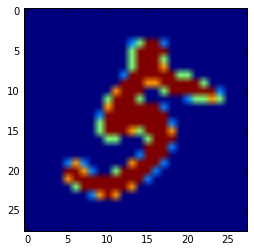

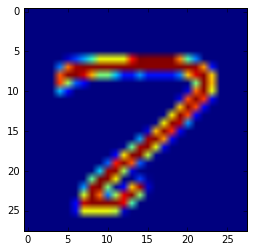

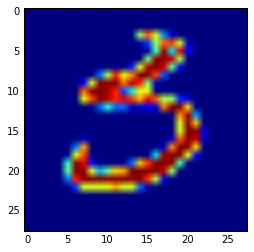

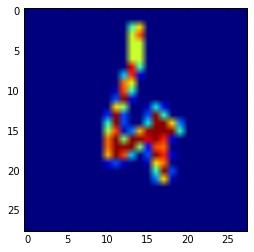

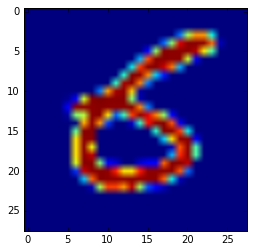

In [11]:
#index of incorrect classifications
import matplotlib.pyplot as plt 
%pylab inline

incorrect = []
import numpy as np
incorrect = np.where(y_test!= predicted_test)

#extracting 5 indexes corresponding incorrect classifications and plotting them 
for i in range(0,5):
    plt.figure()
    a = X_test[incorrect[0][i]].reshape((28,28))
    plt.imshow(a)

# Question 2: Regression Trees (10 points)

In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. You will be using the same Hitters.csv dataset (available on Canvas) used in HW2 Q5 to predict a baseball player’s Salary using all the 16 performance variables. Use a random state of 42 and a test size of 1/3 to split the data into training and test.

1. Build a regression using [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) with max_depth = 5. Report the mean squared errors on both training and test datasets. (4)
2. Repeat Part-1 with max_depth = 2. (4)
3. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 5 and 2? Which tree is better and why? (2)

In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

data = pd.read_csv('Hitters.csv')
label_name = 'Salary'
y = data[label_name]
X = data.drop(label_name,axis=1)
print X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

(263, 16)


In [44]:
dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [45]:
predict_train = dt_model.predict(X_train)
predict_test = dt_model.predict(X_test)

In [49]:
mse_train = np.mean(np.square(predict_train - y_train))
mse_test = np.mean(np.square(predict_test - y_test))

print "MSE on train", mse_train
print "MSE on test", mse_test

MSE on train 18843.5502281
MSE on test 214032.670374


In [50]:
dt_model_2 = DecisionTreeRegressor(max_depth=2)
dt_model_2.fit(X_train,y_train)
predict_train_2 = dt_model_2.predict(X_train)
predict_test_2 = dt_model_2.predict(X_test)

mse_train_2 = np.mean(np.square(predict_train_2 - y_train))
mse_test_2 = np.mean(np.square(predict_test_2 - y_test))

print "MSE on train", mse_train_2
print "MSE on test", mse_test_2


MSE on train 69521.9671959
MSE on test 168079.550851


The first model with max_depth = 5 is more complex model and therefore is overfitting. We want a tree that performs well on test set as well as training set. The second model has a better bias-variance tradeoff and therefore does not overfit, which is why the test set MSE is much lower. 

# Question 3 - Support Vector Regression vs. Linear Regression (10pts)
Download datasets 'summer_gpa_test.csv' and 'summer_gpa_train.csv' from Canvas. With this toy dataset, we want to predict GPA in Summer 2016 for students using 5 different features. So, target variable will be 'GPA_summer2016' in this problem.

1. Fit a support vector regression using the default options on [sklearn's SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) on training data. Note that the default kernel is "rbf".  Report the root MSE for both train and test data. (2)

2. Fit SVR with 'linear' kernel and Linear Regression (for other options, use default parameter settings). Report RMSE of prediction on train and test data for the two methods. (3)

3. Now, compare the results of three different methods, then provide a possible reason for SVR with RBF kernel not working well on test set. (1)

4.  Provide simple residual plots on Train and Test set for all three methods. Specifically, submit a scatter plot wherein y-axis shows the residuals and x-axis the predicted values. What can you learn about the effect of outliers on different models from this problem? (4)

In [36]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

d_train = pd.read_csv('summer_gpa_train.csv',index_col='student')
d_test = pd.read_csv('summer_gpa_test.csv',index_col='student')

y_train = d_train['GPA_summer2016']
y_test = d_test['GPA_summer2016']
x_train = d_train.drop('GPA_summer2016',axis=1)
x_test = d_test.drop('GPA_summer2016',axis=1)

#### 1. Fit a support vector regression using the default options on sklearn's SVR on training data. Note that the default kernel is "rbf". Report the root MSE for both train and test data.

In [19]:
# Training the model
svr_rbf = SVR()
svr_rbf.fit(x_train, y_train)

# Predicting on train
train_pred = svr_rbf.predict(x_train)
print "The RMSE on train: ", round(sqrt(mean_squared_error(y_train, train_pred)),4)

# Predicting on test
test_pred = svr_rbf.predict(x_test)
print "The RMSE on test: ", round(sqrt(mean_squared_error(y_test, test_pred)),4)

The RMSE on train:  0.1747
The RMSE on test:  0.5497


#### 2. Fit SVR with 'linear' kernel and Linear Regression (for other options, use default parameter settings). Report RMSE of prediction on train and test data for the two methods

In [21]:
# SVR

# Training the model
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train, y_train)

# Predicting on train
train_pred = svr_lin.predict(x_train)
print "The RMSE on train: ", round(sqrt(mean_squared_error(y_train, train_pred)),4)

# Predicting on test
test_pred = svr_lin.predict(x_test)
print "The RMSE on test: ", round(sqrt(mean_squared_error(y_test, test_pred)),4)

The RMSE on train:  0.478
The RMSE on test:  0.232


In [16]:
# Linear regression

# Training the model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Predicting on train
train_pred = linreg.predict(x_train)
print "The RMSE on train: ", round(sqrt(mean_squared_error(y_train, train_pred)),4)

# Predicting on test
test_pred = linreg.predict(x_test)
print "The RMSE on test: ", round(sqrt(mean_squared_error(y_test, test_pred)),4)

The RMSE on train:  0.4581
The RMSE on test:  0.2601


#### 3. Now, compare the results of three different methods, then provide a possible reason for SVR with RBF kernel not working well on test set

SVR with an rbf kernel works well on the train set but not on the test set. SVR with a linear kernel and the linear regression models behave similarly with a better performance on the test set in comparison to train.

SVR with rbf kernel does not work well on the test set because there are few number of datapoints and the model seems to be overfitting.

#### 4. Provide simple residual plots on Train and Test set for all three methods. Specifically, submit a scatter plot wherein y-axis shows the residuals and x-axis the predicted values. What can you learn about the effect of outliers on different models from this problem? 

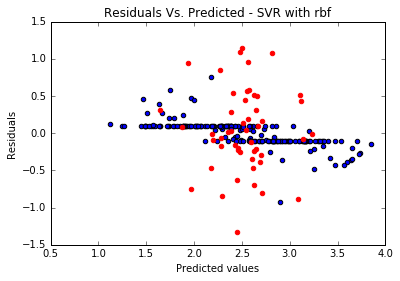

In [88]:
# SVR with rbf kernel

# On train set
train_pred = svr_rbf.predict(x_train)

# Residual plot
plt.scatter(train_pred,train_pred-y_train)
plt.title('Residuals Vs. Predicted - SVR with rbf')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')

# On test set
test_pred = svr_rbf.predict(x_test)

# Residual plot
plt.scatter(test_pred,test_pred-y_test,color='r')

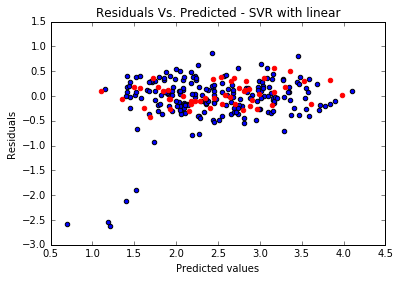

In [87]:
# SVR with linear kernel

# On train set
train_pred = svr_lin.predict(x_train)

# Residual plot
plt.scatter(train_pred,train_pred-y_train)
plt.title('Residuals Vs. Predicted - SVR with linear')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')

# On test set
test_pred = svr_lin.predict(x_test)

# Residual plot
plt.scatter(test_pred,test_pred-y_test,color='r')

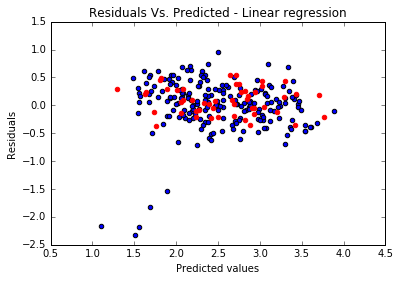

In [86]:
# Linear regression

# On train set
train_pred = linreg.predict(x_train)

# Residual plot
plt.scatter(train_pred,train_pred-y_train)
plt.title('Residuals Vs. Predicted - Linear regression')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')

# On test set
test_pred = linreg.predict(x_test)

# Residual plot
plt.scatter(test_pred,test_pred-y_test,color='r')

- SVR with RBF kernel fits the train data well (actually overfits) as most of the residuals are cluttered together near zero. The effect of the overfitting is seen in the test plot with large residuals. It doesn't seem to be affected by outliers.
- SVR with linear kernel doesn't fit the train data very well since it's susceptible to outliers. Because the model tried to fit outliers, the predictions of other points are also off. This is the reason for a higher error on the train data set. However, due to the linear cost function (outside the band), it is still slightly more robust to the outliers than the linear regression.
- Linear Regression reacts to the outliers similar to 'linear' kernels. Therefore, we have a higher train error since the model tries to take outliers into account while fitting. 

# Question 4: Bayesian Networks (10 pts)
#### Part (a) (5 points)
Consider the following Bayesian network of binary (True/False) variables.

<img src="hw4q4pic1.png">

This is equivalent to saying that X and Y are conditionally independent given C, or P(X,Y|C) = P(X|C)P(Y|C). This happens to be the assumption used by the Naive Bayes classifier.

The exact probabilities are given:  
P(X = True | C = True) = .75  
P(X = True | C = False) = .5  
P(Y = True | C = True) = .25  
P(Y = True | C = False) = .5  
P(C = True) = .5

Find P(C = True | X = True, Y = True). The easiest method is to use Bayes rule, along with the conditional independence equation given above.

#### (b) (5 points)
A new feature Z is added, and based on prior knowledge, we believe that one of the two networks given below properly captures the dependencies among the variables. Our goal is to determine P(C|X,Y,Z). For each of these two different networks:

<img src="hw4q4pic2.png">

will P(C|X,Y,Z) be the same as P(C|X,Y) (the inference from part a)? Or will it be different? Give a separate answer for each network.

##### Part A Answer:

$$ P(C=True|X=True,Y=True) = \frac{P(X=T,Y=T|C)P(C=T)}{P(C,X=T,Y=T)} $$

$$ = \frac{P(X=T|C)P(Y=T|C)P(C=T)}{[P(C=T)P(X|C=T)P(Y|C=T)]+[P(C=F)P(X|C=F)P(Y|C=F)]}$$

$$ = \frac{0.75\times0.25\times0.5}{[0.5\times0.75\times0.25]+[(0.5\times0.5\times0.5]}$$

$$ = \frac{3}{7} = 0.428 $$

##### Part B Answer:

##### First Network

The P(C|X,Y,Z) WILL be the same as the P(C|X,Y) because the conditional probabilities are the same as the original network in Part A. Because Node Z is dependent on both X and Y, the probabilities cancel out leaving the P(C|X,Y,Z) = P(C|X,Y).

= P(C) * P(X|C) * P(Y|C) * P(Z|X,Y) / [P(X) * P(Y|C) * P(Z|X,Y)]

= P(C) * P (X,Y|C) / P(X,Y) = P(C|X,Y)

##### Second Network
The P(C|X,Y,Z) WILL NOT be the same as the P(C|X,Y) because the conditional probabilities are different than the original network in Part A. Node Y is now conditionally dependent on both Nodes C and Z, so the P(C|X,Y,Z) will need to be calculated given P(Y|C,Z) which was not part of the original equation.

# Question 5: Mulitclass Classification (5 points)

One way of using a binary classifier for addressing a multiclass classification problem is to use a One-vs.-All (or One-vs.-Rest)  strategy.

1. Briefly describe the  One-vs.-All method.  (2pts)

2. What are two disadvantages of using the One-vs.-All method in situations where the number of classes $N$ is very large? (3pts)

1) The one-vs all method trains a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. So, we are not concerned about the values of the other classes per se. They would just be classified as negative. If there are N classes, N classifiers need to be trained if we want to classify into one particular class. When new data comes in, the class assigned is the one with the maximum posterior probability. 

2) 
- In situations where N is very large, we would have a very unbalanced proportion of negative classes in our sample dataset. This could potentially distort the models predictions which depend on the distribution of classes. For example, in a NB classifier, since the model computes the priors and also the class conditional probabilities which depend on the number of records in each class, we will get a very skewed prediction which tilts towards the negative class ( all the other classes ) 
- If N is very large, the method will be computationally expensive as each classfier looks at one class Vs. all the other classes